In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('dataset_group.csv',parse_dates=True,squeeze=False,index_col=0) 
# squeeze= If the parsed data only contains one column then return a Series.
df.head()

,Order_id,Product
Date,,
2018-01-01,1,yogurt
2018-01-01,1,pork
2018-01-01,1,sandwich bags
2018-01-01,1,lunch meat
2018-01-01,1,all- purpose


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20641 entries, 2018-01-01 to 2020-02-26
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Order_id  20641 non-null  int64 
 1   Product   20641 non-null  object
dtypes: int64(1), object(1)
memory usage: 483.8+ KB


In [98]:
df['Order_id']=df['Order_id'].astype('object')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20641 entries, 2018-01-01 to 2020-02-26
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Order_id  20641 non-null  object
 1   Product   20641 non-null  object
dtypes: object(2)
memory usage: 483.8+ KB


In [100]:
df.describe().T

,count,unique,top,freq
Order_id,20641,1139,957,34
Product,20641,37,poultry,640


In [101]:
D=df.groupby(by='Date',axis=0,sort=True).count()
D.head(10)

,Order_id,Product
Date,,
2018-01-01,39,39
2018-01-02,15,15
2018-01-03,127,127
2018-01-04,28,28
2018-01-05,37,37
2018-01-06,18,18
2018-01-07,24,24
2018-01-08,12,12
2018-01-09,24,24


In [102]:
D.tail(10)

,Order_id,Product
Date,,
2020-08-01,8,8
2020-08-02,41,41
2020-09-01,45,45
2020-09-02,87,87
2020-10-01,15,15
2020-10-02,22,22
2020-11-01,87,87
2020-11-02,19,19
2020-12-01,27,27


In [103]:
D.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 603 entries, 2018-01-01 to 2020-12-02
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Order_id  603 non-null    int64
 1   Product   603 non-null    int64
dtypes: int64(2)
memory usage: 14.1 KB


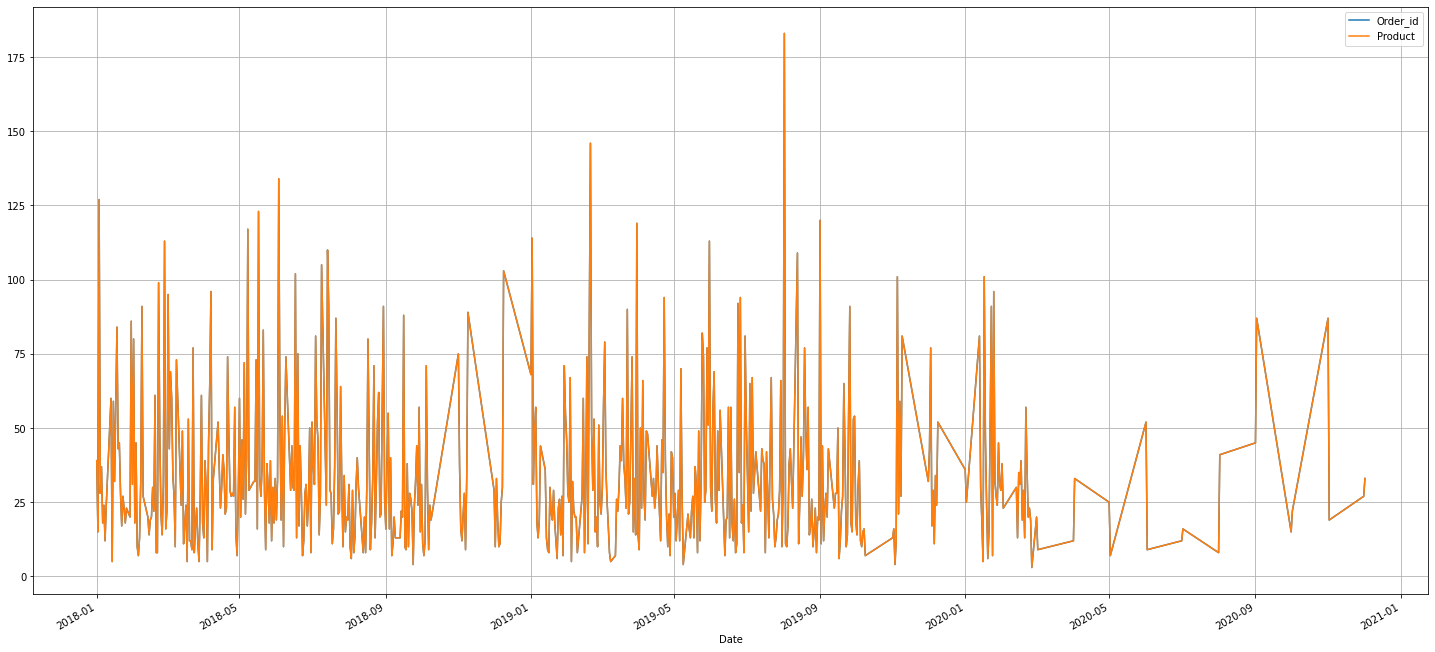

In [104]:
# plt.figure(figsize=(50,20))
from pylab import rcParams
rcParams['figure.figsize'] = 25,12
D.plot();
plt.grid();

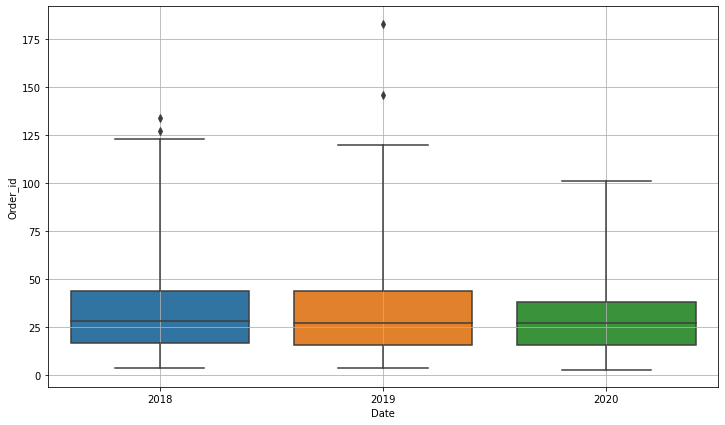

In [105]:
# Yearly boxplot
plt.figure(figsize=(12,7))
sns.boxplot(x = D.index.year,y = D['Order_id'],whis=3)
plt.grid();

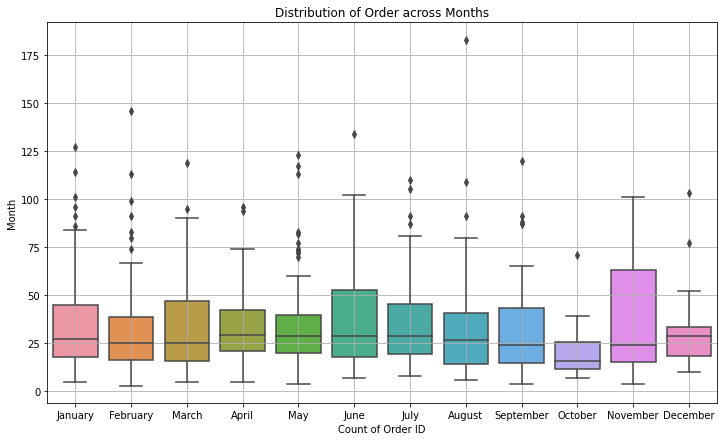

In [127]:
plt.figure(figsize=(12,7))
sns.boxplot(x = D.index.month_name(),y = D['Order_id'])
plt.title('Distribution of Order across Months')
plt.xlabel('Count of Order ID')
plt.ylabel('Month')
plt.grid();

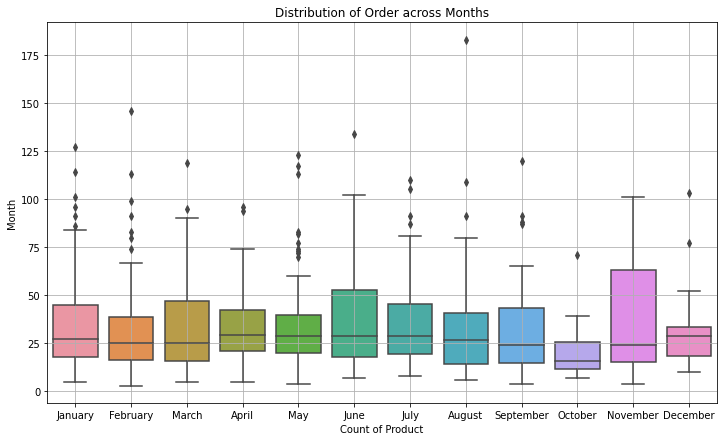

In [126]:
plt.figure(figsize=(12,7))
sns.boxplot(x = D.index.month_name(),y = D['Product'])
plt.title('Distribution of Order across Months')
plt.xlabel('Count of Product')
plt.ylabel('Month')
plt.grid();

In [107]:
from statsmodels.graphics.tsaplots import month_plot
monthly_sales_across_years_Arrival = pd.pivot_table(D, values = 'Order_id', columns = D.index.month, index = D.index.year)
monthly_sales_across_years_Arrival

Date,1,2,3,4,5,6,7,8,9,10,11,12
Date,,,,,,,,,,,,
2018,36.678571,34.68,32.035714,34.666667,40.857143,38.407407,41.821429,31.928571,26.000000,23.777778,35.555556,30.000000
2019,31.535714,36.60,37.142857,32.592593,34.107143,35.407407,32.714286,36.428571,35.259259,18.111111,37.111111,35.444444
2020,39.142857,26.75,14.500000,22.500000,16.000000,30.500000,14.000000,24.500000,66.000000,18.500000,53.000000,30.000000


<Figure size 864x504 with 0 Axes>

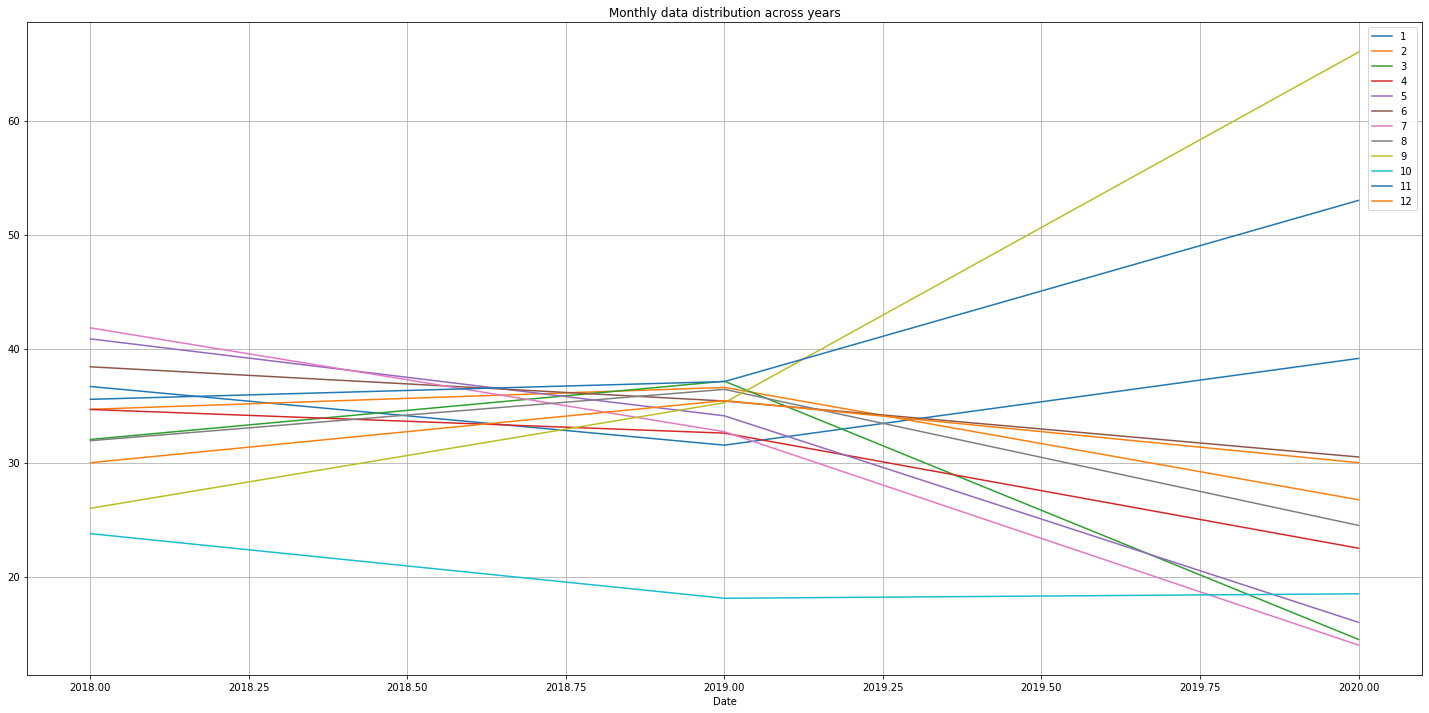

In [108]:
plt.figure(figsize=(12,7))
monthly_sales_across_years_Arrival.plot()
plt.grid()
plt.legend(loc='best');
plt.title('Monthly data distribution across years');

In [110]:
# from    statsmodels.tsa.seasonal import   seasonal_decompose
# decomposition_21 = seasonal_decompose(D['Order_id'],model='multiplication')
# decomposition_21.plot();

In [ ]:
# this is not a time series model

In [113]:
D

,Order_id,Product
Date,,
2018-01-01,39,39
2018-01-02,15,15
2018-01-03,127,127
2018-01-04,28,28
2018-01-05,37,37
...,...,...
2020-10-02,22,22
2020-11-01,87,87
2020-11-02,19,19


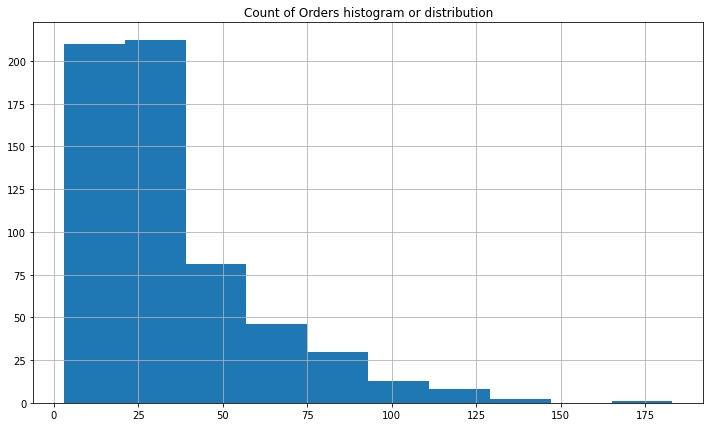

In [129]:
plt.figure(figsize=(12,7))
plt.title('Count of Orders histogram or distribution')
D['Order_id'].hist();

In [145]:
df.groupby('Order_id',axis=0).sum()

,Product
Order_id,
1,yogurtporksandwich bagslunch meatall- purposef...
2,toilet papershampoohand soapwafflescheesesmixe...
3,sodaporksoapice creamtoilet paperdinner rollsh...
4,cerealsjuicelunch meatsodatoilet paperall- pur...
5,sandwich loavespastatortillasmixeshand soaptoi...
...,...
1135,sugarbeefsandwich bagshand soappaper towelspap...
1136,coffee/teadinner rollslunch meatspaghetti sauc...
1137,beeflunch meateggspoultrytortillasbeefbeefindi...
